In [209]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
plt.rcParams["savefig.bbox"] = 'tight'

import torch
from torch import nn
import torchvision
import torchvision.transforms as T
import torchvision.transforms.functional as TF

import lightning.pytorch as pl

import random
import os
import csv
from pathlib import Path

# from skimage import io, color
from PIL import Image

In [210]:
# Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

Using device: cuda


# Dataset

In [211]:
# Setup path to data folder
from pathlib import Path
image_path = Path("data/IMG/")

# Get all image paths (* means "any combination")
image_path_list = list(image_path.glob("center_*.jpg"))

# Get random image path
# random.seed(42)
random_image_path = random.choice(image_path_list)

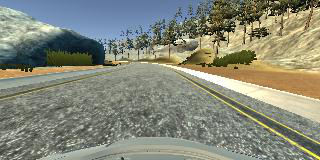

In [212]:
# Open image
image = Image.open(random_image_path)
image

## Transform Explore

In [213]:
print(f"Image height: {image.height}") 
print(f"Image width: {image.width}")

Image height: 160
Image width: 320


In [214]:
# gray_image = TF.rgb_to_grayscale(image)
# gray_image

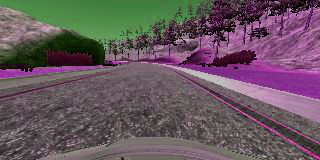

In [215]:
jitter = T.ColorJitter(brightness=.5, hue=.3, contrast=0.1, saturation=0.4)
jittered_image = jitter(image)
jittered_image

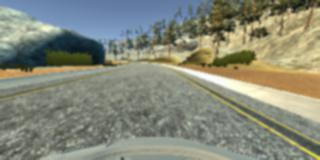

In [216]:
blurred_image = TF.gaussian_blur(image, kernel_size=5)
blurred_image

In [217]:
# gray_image = TF.rgb_to_grayscale(image)
# gray_image

## Preprocessing Images

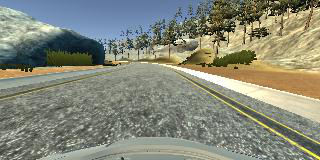

In [218]:
image

In [219]:
print(f"Image height: {image.height}") 
print(f"Image width: {image.width}")

Image height: 160
Image width: 320


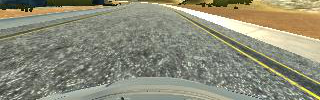

In [220]:
cropped_image = TF.crop(image, 
                       top=60, 
                       left=0, 
                       height=100,
                       width=320)

cropped_image

In [221]:
print(f"Image height: {cropped_image.height}") 
print(f"Image width: {cropped_image.width}")

Image height: 100
Image width: 320


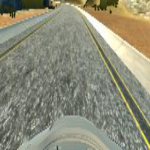

In [222]:
preprocessed_image = TF.resize(cropped_image, (150, 150))
preprocessed_image

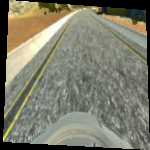

In [257]:
perspective_transformer = T.RandomPerspective(distortion_scale=0.15, p=1.0)
perspective_transformer(preprocessed_image)

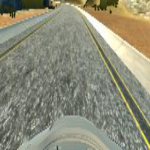

In [284]:
sharpness_adjuster = T.RandomAdjustSharpness(sharpness_factor=4)
sharpness_adjuster(preprocessed_image)

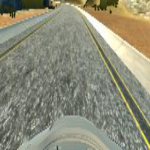

In [258]:
preprocessed_image = TF.hflip(preprocessed_image)
preprocessed_image

## Transforms

In [224]:
tensor_image = TF.to_tensor(preprocessed_image)
tensor_image.shape

torch.Size([3, 150, 150])

In [225]:
mean_per_channel = tensor_image.mean(dim = [1,2])
std_per_channel = tensor_image.std(dim = [1,2])

In [226]:
mean_R, mean_G, mean_B = mean_per_channel
std_R, std_G, std_B = std_per_channel

In [227]:
train_transform = T.Compose([
    T.Resize((132, 132)),
    T.RandomCrop((128, 128)),
    T.ColorJitter(brightness=0.1, hue=0.1, contrast=0.1, saturation=0.1),
    T.GaussianBlur(kernel_size=3),
    T.ToTensor(),
    T.Normalize((mean_R, mean_G, mean_B), (std_R, std_G, std_B)),
])

In [228]:
y = train_transform(preprocessed_image)

from utils import denormalize_rgb
x = denormalize_rgb(y, mean_per_channel, std_per_channel)
x.shape

torch.Size([3, 128, 128])

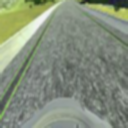

In [229]:
TF.to_pil_image(x)